In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
#数据集加载
(x_train_image,y_train_label),(x_test_image,y_test_label) = tf.keras.datasets.cifar10.load_data()
x_train_normalize = x_train_image.astype('float32')/255   #归一化
x_test_normalize = x_test_image.astype('float32')/255
y_train_OneHot = tf.keras.utils.to_categorical(y_train_label)   #onehot编码
y_test_OneHot = tf.keras.utils.to_categorical(y_test_label)

In [3]:
model = tf.keras.models.Sequential()   #模型创建
model.add(keras.layers.Conv2D(filters=6,kernel_size=3,strides=1,input_shape=(32,32,3)))
model.add(keras.layers.MaxPooling2D(pool_size=2,strides=2))
model.add(keras.layers.ReLU())
model.add(keras.layers.Conv2D(filters=16,kernel_size=3,strides=1))
model.add(keras.layers.MaxPooling2D(pool_size=2,strides=2))
model.add(keras.layers.ReLU())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(120,activation='relu'))
model.add(keras.layers.Dense(84,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 6)         168       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 6)         0         
_________________________________________________________________
re_lu (ReLU)                 (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
re_lu_1 (ReLU)               (None, 6, 6, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [6]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_train = model.fit(x=x_train_normalize,y=y_train_OneHot,validation_split=0.2,epochs=30,batch_size=300,verbose=1)

Epoch 1/30
134/134 [==============================] - 1s 8ms/step - loss: 1.8611 - accuracy: 0.3267 - val_loss: 1.6541 - val_accuracy: 0.4028
Epoch 2/30
134/134 [==============================] - 1s 5ms/step - loss: 1.5543 - accuracy: 0.4432 - val_loss: 1.5394 - val_accuracy: 0.4438
Epoch 3/30
134/134 [==============================] - 1s 5ms/step - loss: 1.4499 - accuracy: 0.4817 - val_loss: 1.4242 - val_accuracy: 0.4927
Epoch 4/30
134/134 [==============================] - 1s 5ms/step - loss: 1.3789 - accuracy: 0.5103 - val_loss: 1.3725 - val_accuracy: 0.5131
Epoch 5/30
134/134 [==============================] - 1s 5ms/step - loss: 1.3254 - accuracy: 0.5305 - val_loss: 1.3466 - val_accuracy: 0.5246
Epoch 6/30
134/134 [==============================] - 1s 5ms/step - loss: 1.2817 - accuracy: 0.5477 - val_loss: 1.3109 - val_accuracy: 0.5401
Epoch 7/30
134/134 [==============================] - 1s 5ms/step - loss: 1.2407 - accuracy: 0.5621 - val_loss: 1.2986 - val_accuracy: 0.5436
Epoch 

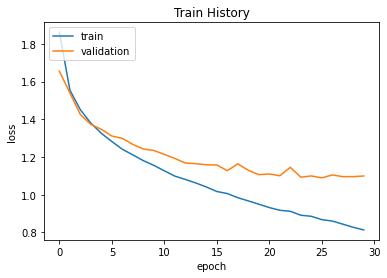

In [7]:
def train_history(model_train,train,val):
    plt.plot(model_train.history[train])
    plt.plot(model_train.history[val])
    plt.title('Train History')
    plt.xlabel('epoch')
    plt.ylabel(train)
    plt.legend(['train','validation'],loc='upper left')
    
train_history(model_train,'loss','val_loss')

In [8]:
scores = model.evaluate(x_test_normalize,y_test_OneHot,verbose=2)

313/313 - 0s - loss: 1.1001 - accuracy: 0.6275


In [9]:
model.save('./Mylenet.h5', save_format="h5")

In [11]:
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.utils.generic_utils import CustomObjectScope
#model = tf.keras.models.load_model('MyAlex.h5')
#print(model.summary())

 
#keras_model = tf.keras_models.load_model("./MyAlex.h5")
keras_model =tf.keras.models.load_model ("./Mylenet.h5")

converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()

open("./Mylenet.tflite","wb").write(tflite_model)
 


328620